# Bayesian network example

---

Investigate and run the code from `example2.py`, which refers to a more complicated real-life example.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from py_banshee.rankcorr import bn_rankcorr
from py_banshee.bn_plot import bn_visualize
from py_banshee.copula_test import cvm_statistic
from py_banshee.d_cal import gaussian_distance
from py_banshee.prediction import inference
from py_banshee.sample_bn import generate_samples
from py_banshee.sample_bn import sample_based_conditioning

In [ ]:
# Load data

# Structure of the BN

# Rank correlation matrix

# Visualization

# Evaluation

# Inference

In [10]:
# Load data
data = pd.read_csv('py_banshee_examples/Concrete_vehicle_bridge_column.csv')
data.head()

,WA1,WA2,ApL1,ApL2,MaxP,MaxV2,MaxV3,MaxM2,MaxM3,MaxT,U1,U2,U3,R1,R2,R3,PGA,fc,Ec,fy,fu
0,327.081197,964.729194,4.0,9.0,-7033.925098,-1300.330136,-61.357552,640.531268,5180.075463,87.030097,-0.000130,0.014109,-0.000178,0.001179,-0.000059,0.000163,0.5274,26.198549,23605.546836,398.250216,734.986691
1,610.905262,512.652435,6.0,9.0,-9014.577744,1417.105953,-98.496455,842.525599,5200.006135,161.116713,0.000092,0.015138,-0.000088,0.001654,-0.000009,0.000086,0.6952,39.106150,29781.071991,387.343321,655.281417
2,483.163839,523.302457,9.0,9.0,-9833.376189,1645.806469,-134.005870,909.383623,5550.172556,219.647613,-0.000829,0.040553,0.000176,0.002240,-0.000199,0.000300,0.1913,28.371952,26089.635043,492.142460,787.371739
3,439.602700,973.633632,8.0,9.0,-13199.087562,-1898.795833,-223.856263,1664.287691,6400.239820,468.242799,0.004503,0.151427,0.000762,0.003341,0.000746,0.000879,0.2729,31.163737,25729.323542,405.314915,722.269664
4,405.416718,294.003367,7.0,5.0,-11576.316716,-1661.260355,-186.111255,1378.907104,5543.735088,327.644069,0.002074,0.095535,0.000606,0.002680,0.000321,0.000523,0.7832,31.479923,25505.323265,449.893075,675.460927


In [15]:
# Names of the variables (nodes)

# +--------+--------------------------------------------------+
# |  Node  |                    Description                   |
# +--------+--------------------------------------------------+
# | ApL1   | Number of axles in lane 1 of the bridge.         |
# +--------+--------------------------------------------------+
# | ApL2   | Number of axles in lane 2 of the bridge.         |
# +--------+--------------------------------------------------+
# | WA1    | Total vehicle weight in lane 1.                  |
# +--------+--------------------------------------------------+
# | WA2    | Total vehicle weight in lane 2.                  |
# +--------+--------------------------------------------------+
# | PGA    | Peak ground acceleration.                        |
# +--------+--------------------------------------------------+
# | f'c    | Compressive strength of concrete.                |
# +--------+--------------------------------------------------+
# | Ec     | Modulus of elasticity of the concrete.           |
# +--------+--------------------------------------------------+
# | fy     | Yield strength of steel.                         |
# +--------+--------------------------------------------------+
# | fu     | Tensile strength.                                |
# +--------+--------------------------------------------------+
# | MaxP   | Maximum Axial load.                              |
# +--------+--------------------------------------------------+
# | MaxV2  | Maximum Shear in direction 2.                    |
# +--------+--------------------------------------------------+
# | MaxV3  | Maximum Shear in direction 3.                    |
# +--------+--------------------------------------------------+
# | MaxM2  | Maximum Bending moment in direction 2.           |
# +--------+--------------------------------------------------+
# | MaxM3  | Maximum Bending moment in direction 3.           |
# +--------+--------------------------------------------------+
# | MaxT   | Maximum Torsional moment.                        |
# +--------+--------------------------------------------------+
# | U1     | Displacement of the study joint in direction 1.  |
# +--------+--------------------------------------------------+
# | U2     | Displacement of the study joint in direction 2.  |
# +--------+--------------------------------------------------+
# | U3     | Displacement of the study joint in direction 3.  |
# +--------+--------------------------------------------------+

In [11]:
# Select the columns of interest
cols = [2, 3, 16, 17, 18, 19, 20, 0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12]
data = data.iloc[:, cols]

# Nodes of the BN
node_names = list(data.columns)
node_num = len(node_names)

In [12]:
# Inspect the data
data.head()

,ApL1,ApL2,PGA,fc,Ec,fy,fu,WA1,WA2,MaxP,MaxV2,MaxV3,MaxM2,MaxM3,MaxT,U1,U2,U3
0,4.0,9.0,0.5274,26.198549,23605.546836,398.250216,734.986691,327.081197,964.729194,-7033.925098,-1300.330136,-61.357552,640.531268,5180.075463,87.030097,-0.000130,0.014109,-0.000178
1,6.0,9.0,0.6952,39.106150,29781.071991,387.343321,655.281417,610.905262,512.652435,-9014.577744,1417.105953,-98.496455,842.525599,5200.006135,161.116713,0.000092,0.015138,-0.000088
2,9.0,9.0,0.1913,28.371952,26089.635043,492.142460,787.371739,483.163839,523.302457,-9833.376189,1645.806469,-134.005870,909.383623,5550.172556,219.647613,-0.000829,0.040553,0.000176
3,8.0,9.0,0.2729,31.163737,25729.323542,405.314915,722.269664,439.602700,973.633632,-13199.087562,-1898.795833,-223.856263,1664.287691,6400.239820,468.242799,0.004503,0.151427,0.000762
4,7.0,5.0,0.7832,31.479923,25505.323265,449.893075,675.460927,405.416718,294.003367,-11576.316716,-1661.260355,-186.111255,1378.907104,5543.735088,327.644069,0.002074,0.095535,0.000606


In [13]:
# Structure of the BN
parent_cells = [None] * node_num

parent_cells[0] = []
parent_cells[1] = []
parent_cells[2] = []
parent_cells[3] = []
parent_cells[4] = [3]
parent_cells[5] = []
parent_cells[6] = [5]
parent_cells[7] = [0]
parent_cells[8] = [1]
parent_cells[9] = [2, 3, 4, 5, 6, 7, 8]
parent_cells[10] = [2, 3, 4, 5, 6, 7, 8, 9]
parent_cells[11] = [2, 3, 4, 5, 6, 7, 8, 9, 10]
parent_cells[12] = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
parent_cells[13] = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
parent_cells[14] = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
parent_cells[15] = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
parent_cells[16] = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
parent_cells[17] = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

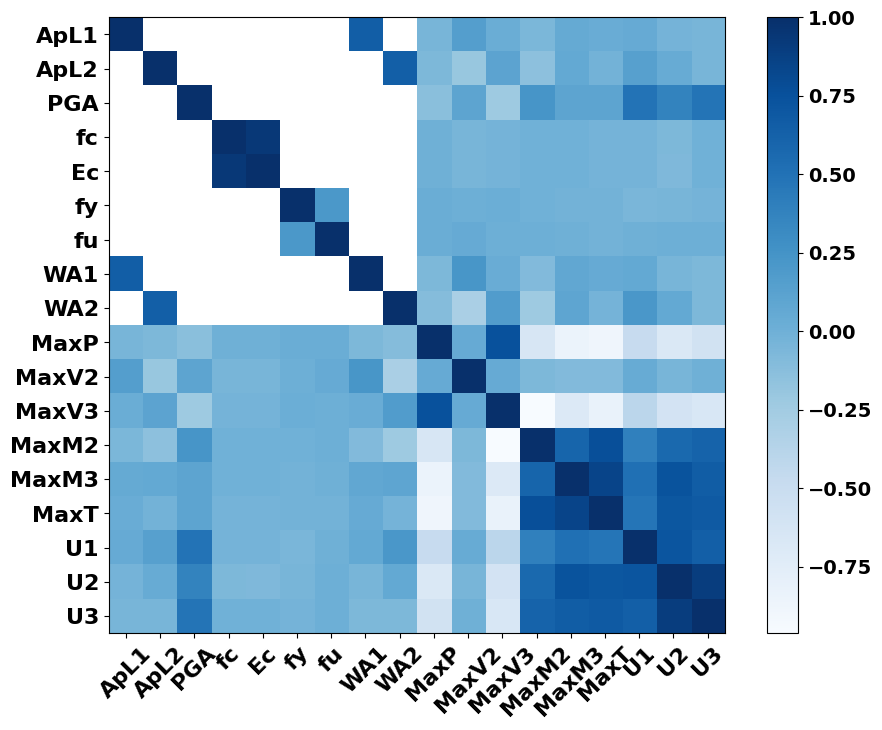

In [14]:
# Conditional rank correlation matrix
R = bn_rankcorr(parent_cells, data, var_names=node_names, is_data=True, plot=True)

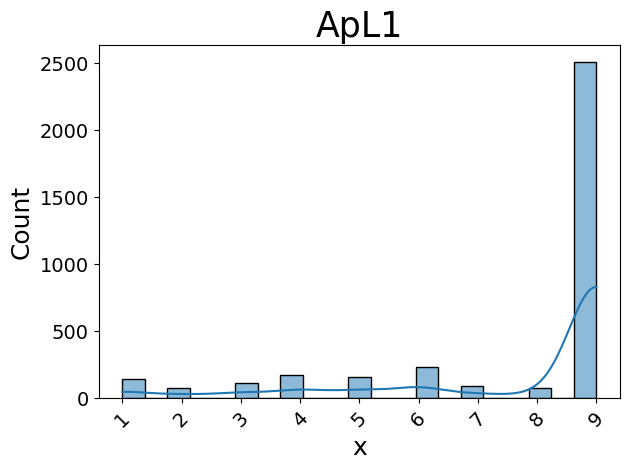

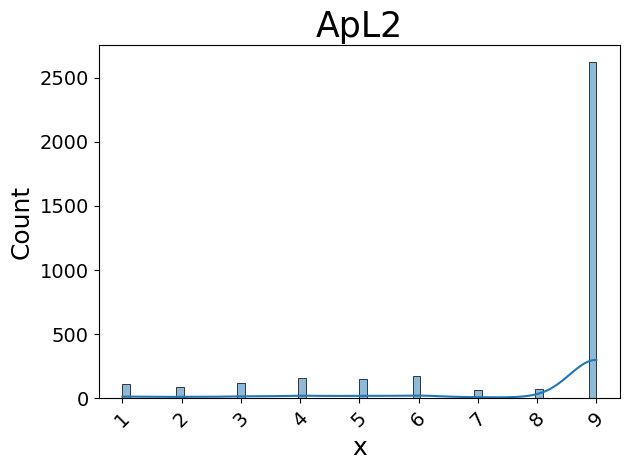

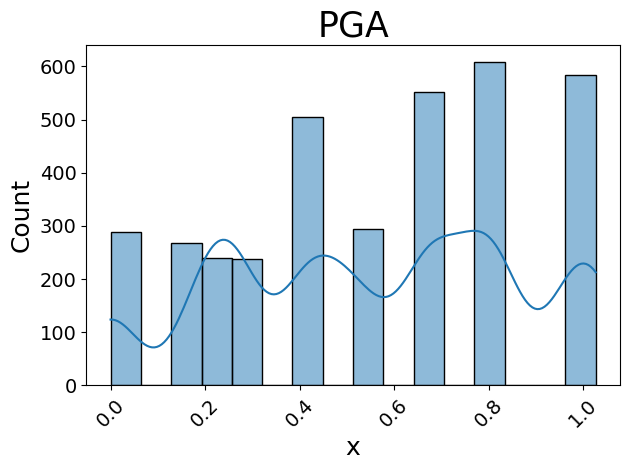

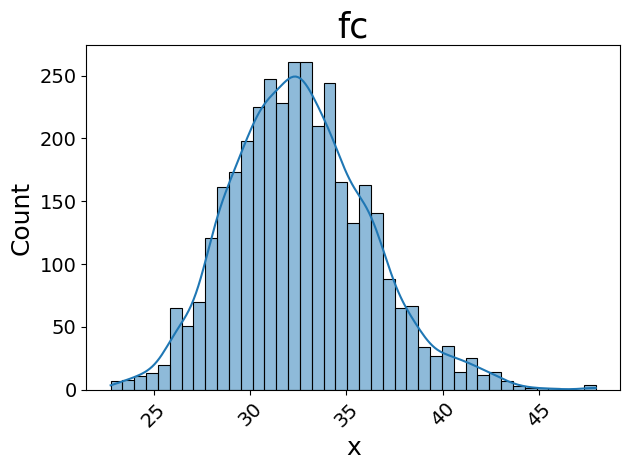

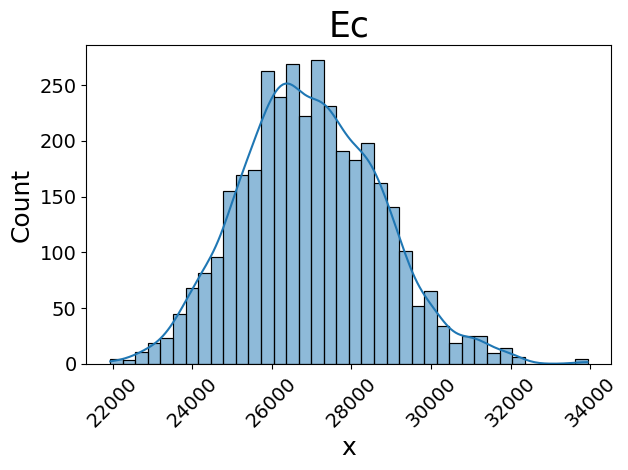

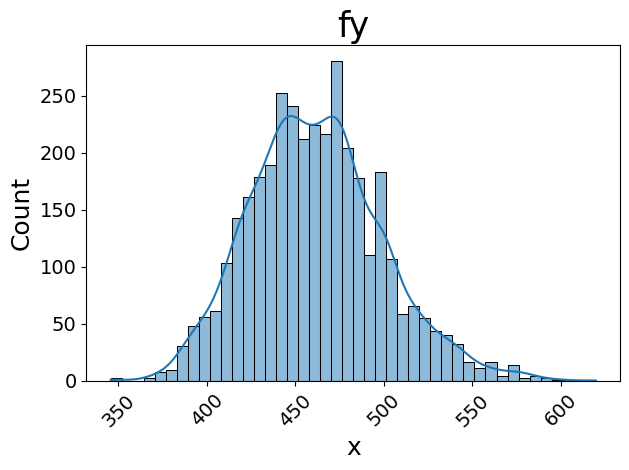

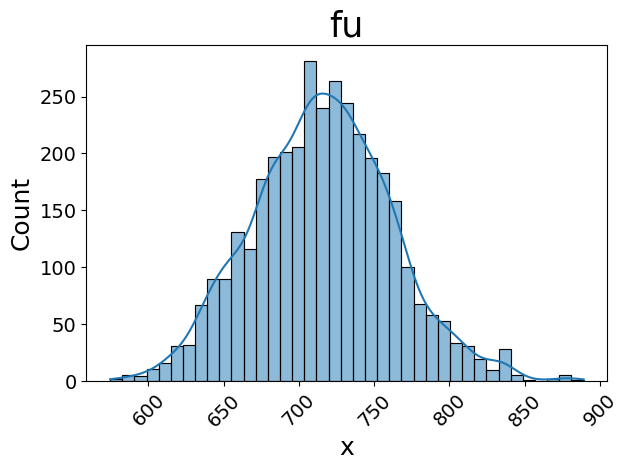

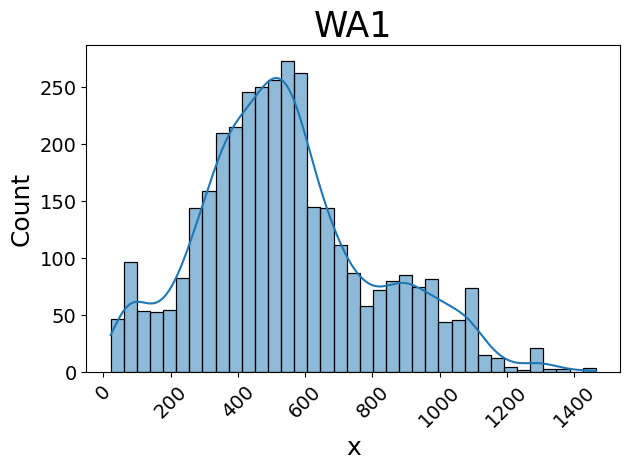

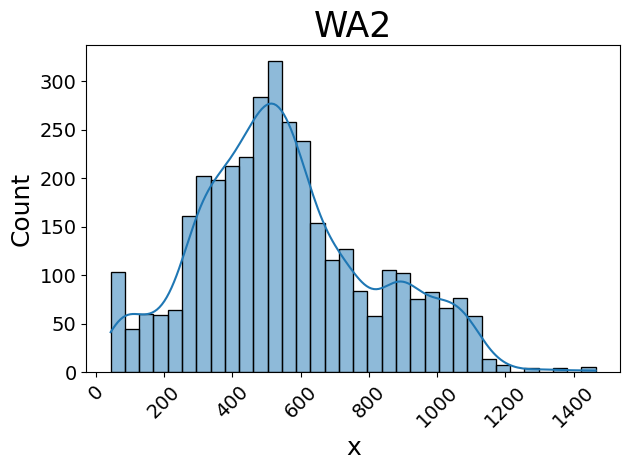

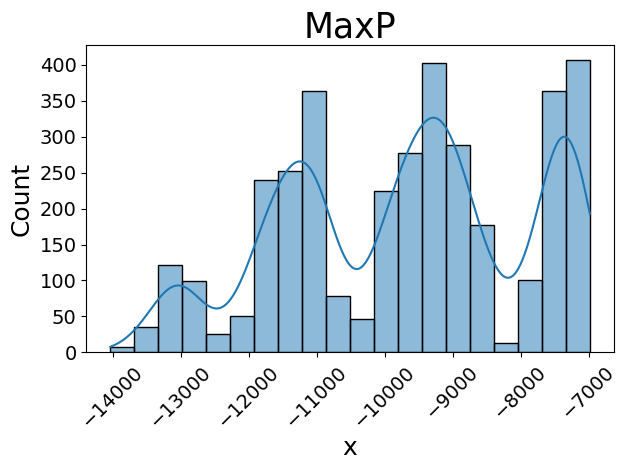

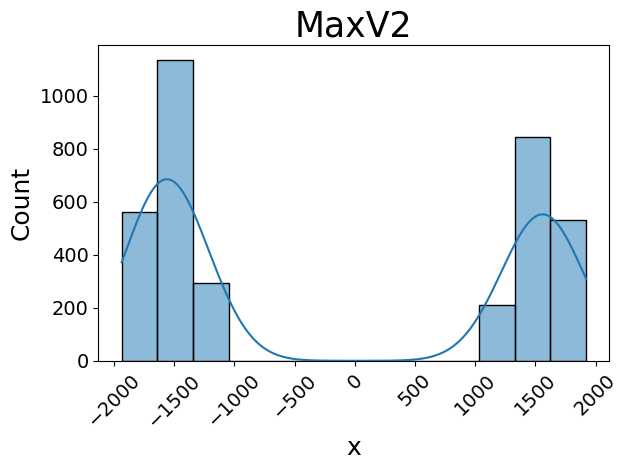

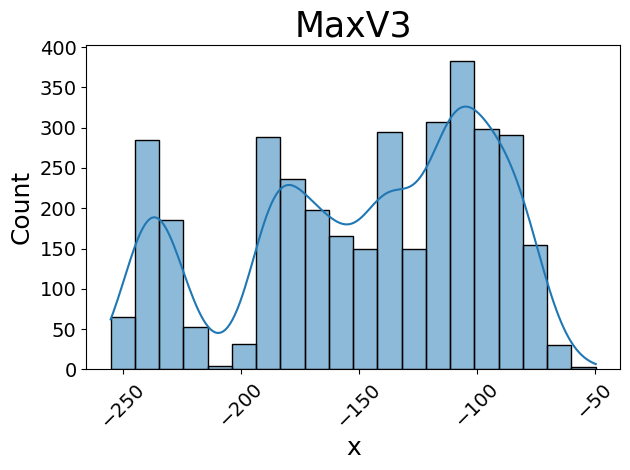

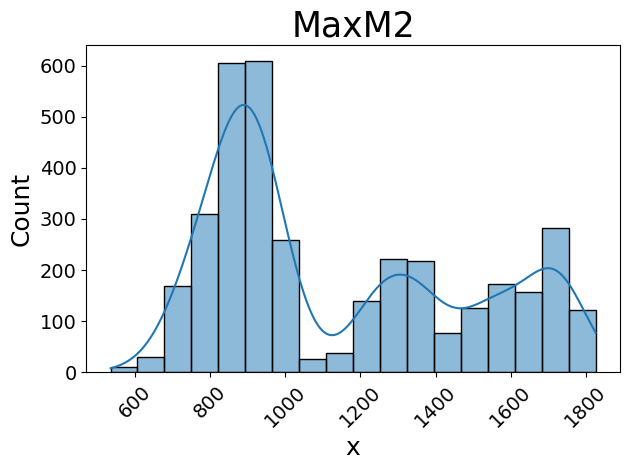

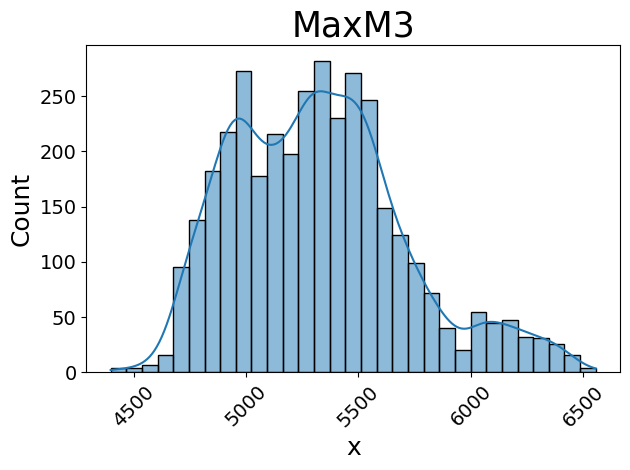

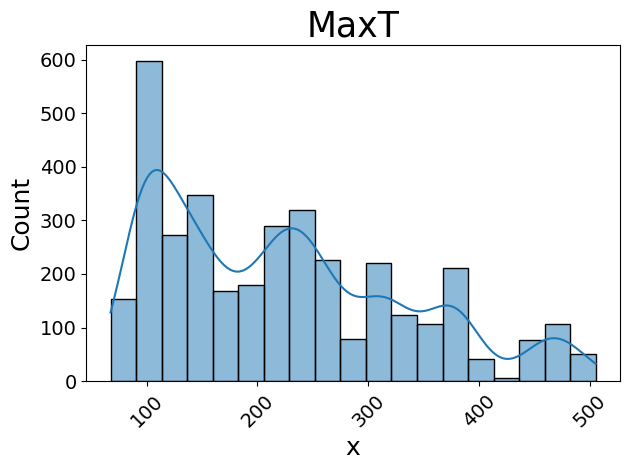

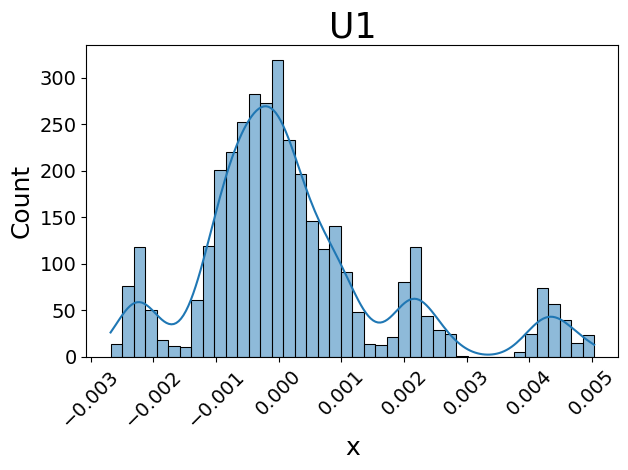

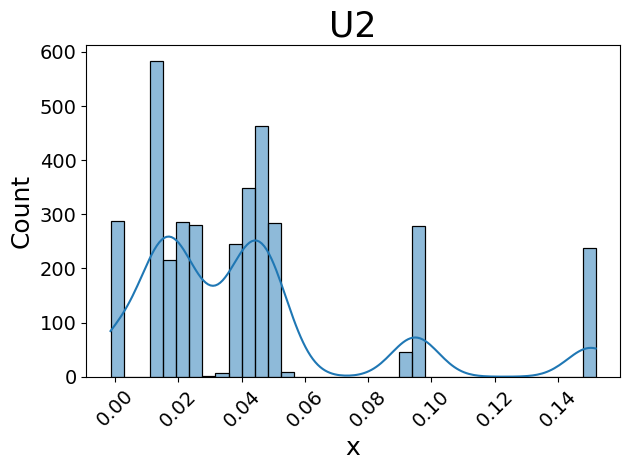

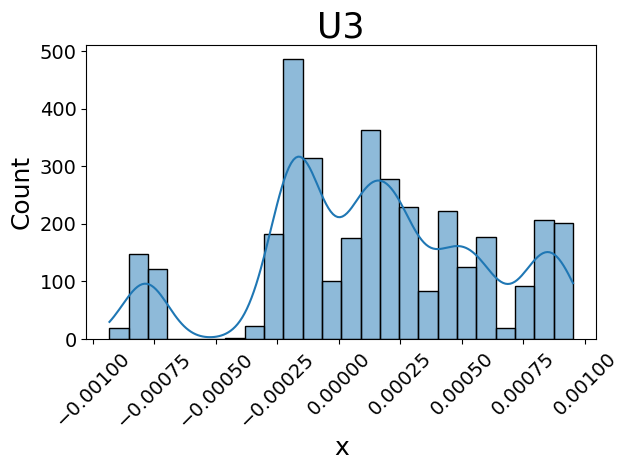

'BN plot saved in : c:\\Users\\yzhang11\\OneDrive - Delft University of Technology\\Personal Files\\Education\\Learning materials\\Repositories\\Heaven-of-Learning\\py_banshee_learning\\BN_visualize_NPBN_bridge.pdf'

In [16]:
# Visualize the BN
bn_visualize(parent_cells, R, node_names, data=data, fig_name='NPBN_bridge_marginals')
bn_visualize(parent_cells, R, node_names, fig_name='NPBN_bridge')

c:\Users\yzhang11\AppData\Local\miniconda3\envs\py_banshee\Lib\site-packages\pycopula\copula.py:314: RuntimeWarning: overflow encountered in power
  prod *= (theta / (np.log(x[i]) * x[i]))*(-np.log(x[i]))**theta
c:\Users\yzhang11\AppData\Local\miniconda3\envs\py_banshee\Lib\site-packages\pycopula\archimedean_generators.py:33: RuntimeWarning: overflow encountered in power
  return (-np.log(x))**theta
c:\Users\yzhang11\AppData\Local\miniconda3\envs\py_banshee\Lib\site-packages\pycopula\copula.py:318: RuntimeWarning: invalid value encountered in multiply
  return 1. / theta**2 * t**(1. / theta - 2.) * (theta + t**(1. / theta) - 1.) * np.exp(-t**(1. / theta))
c:\Users\yzhang11\AppData\Local\miniconda3\envs\py_banshee\Lib\site-packages\pycopula\copula.py:318: RuntimeWarning: divide by zero encountered in power
  return 1. / theta**2 * t**(1. / theta - 2.) * (theta + t**(1. / theta) - 1.) * np.exp(-t**(1. / theta))
c:\Users\yzhang11\AppData\Local\miniconda3\envs\py_banshee\Lib\site-packages\

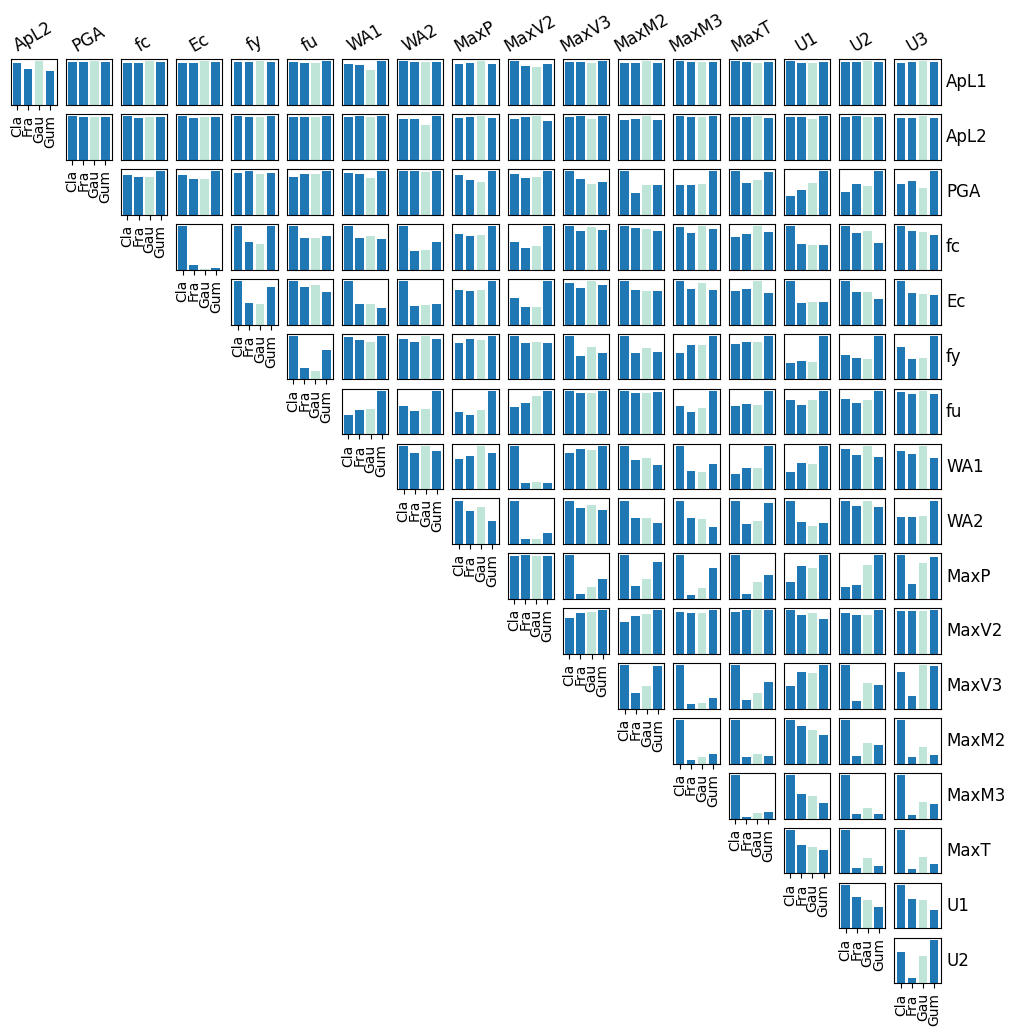

In [17]:
# CVM statistics to test the goodness of fit of the Gaussian copula
M = cvm_statistic(data, names=node_names, plot=True, fig_name='cvm_bridge')

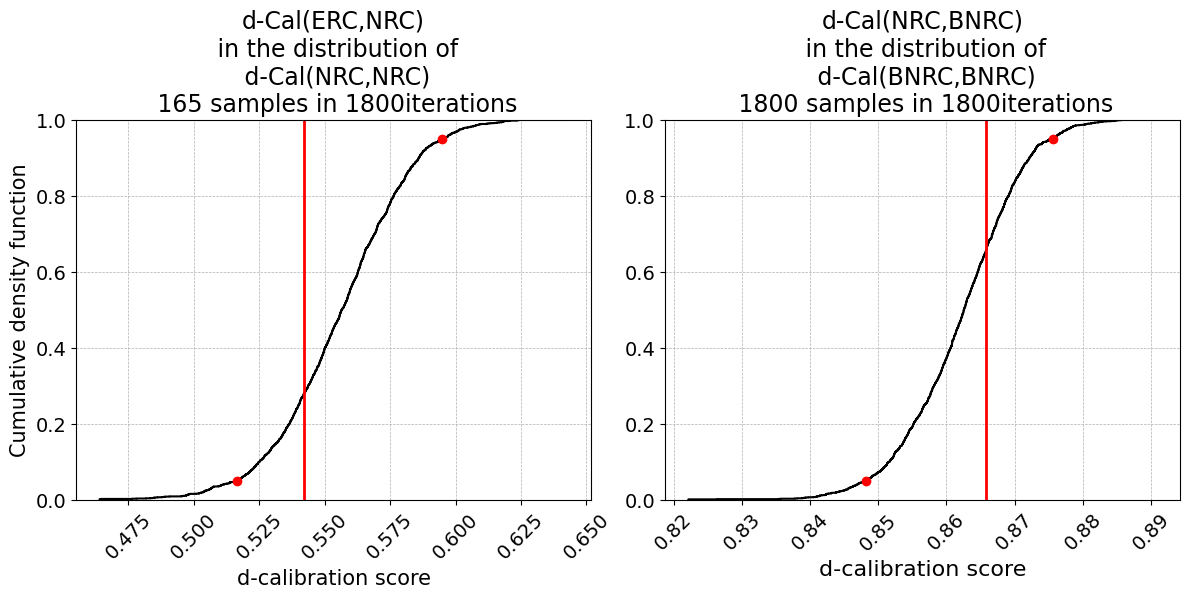

SUCCESS: The d-Cal of the empirical rank correlation matrix (ERC) fall between the confidence intervals of the d-Cal of the normal rank correlation matrix (NRC)

SUCCESS: The d-Cal of the normal rank correlation matrix (NRC) fall between the confidence intervals of the d-Cal of the BN rank correlation matrix (BNRC)



In [18]:
# Measure the d-calibration score
num_iters = 1800
sample_size_ERC_NRC = 165
sample_size_NRC_BNRC = 1800

D_ERC, B_ERC, D_BNRC, B_BNRC = gaussian_distance(
    R, data, sample_size_ERC_NRC, sample_size_NRC_BNRC, num_iters, Plot=True,
    Type='H', fig_name='d_cal_bridge'
    )


In [59]:
# Generate unconditional samples from the BN
num_samples = 1000000
samples = generate_samples(R, num_samples, node_names, data)

In [60]:
# Sample-based conditioning
input_nodes = [2, 3, 5, 7, 8]
output_nodes = list(set(range(node_num)) - set(input_nodes))

# Conditioning intervals
lb_ub = [None] * len(input_nodes)
lb_ub[0] =(0.273, 0.783)    # Lower bound and upper bound of the PGA   
lb_ub[1] =(22.70, 30.00)    # Lower bound and upper bound of the fc
lb_ub[2] =(345.5, 435.0)    # Lower bound and upper bound of the fy
lb_ub[3] =(676.0, 1464.4)   # Lower bound and upper bound of the WA1
lb_ub[4] =(705.0, 1464.4)   # Lower bound and upper bound of the WA2

sm_bc = sample_based_conditioning(samples, input_nodes, lb_ub)

In [61]:
# Comparing the results of Uninet vs. PyBanshee

# Compare the rank correlation matrix (determinants)
uninet_R = np.loadtxt('py_banshee_examples/UNINET_BN_Rank_corr_mat.txt')
uninet_det = np.linalg.det(uninet_R)
pybanshee_det = np.linalg.det(R)

det_diff = abs(uninet_det - pybanshee_det)
det_ratio = uninet_det / pybanshee_det
print('The difference between determinants is ' + str(round(det_diff, 11)) +
      ' and the ratio is ' + str(round(det_ratio,5)))

The difference between determinants is 4e-11 and the ratio is 0.99987


In [66]:
# Compare sample based conditioning
uninet_data_c6 = pd.read_csv('py_banshee_examples/Samp_based_Case_6.csv')
uninet_data_c6 = uninet_data_c6[sm_bc.columns]

# Randomly remove data to match sizes
rows_to_drop = np.random.choice(
    sm_bc.index, size=len(sm_bc) - len(uninet_data_c6), replace=False
    )
sm_bc = sm_bc.drop(rows_to_drop)


units = ['', '', 'g', 'MPa', 'MPa', 'MPa', 'MPa', 'kN', 'kN', 'kN', 'kN', 'kN',
         'kN.m', 'kN.m', 'kN.m', 'm', 'm', 'm']

In [68]:
# Empirical CDFs
def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n + 1) / n
    return (x, y)

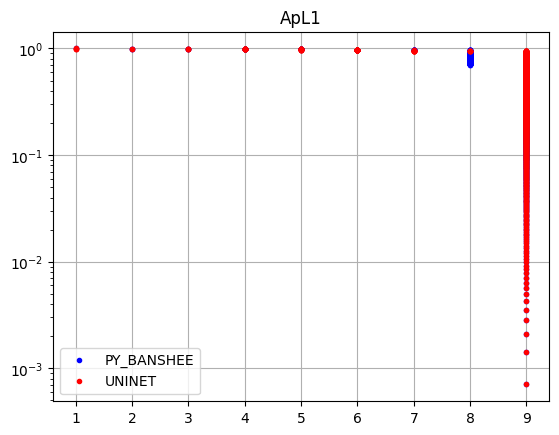

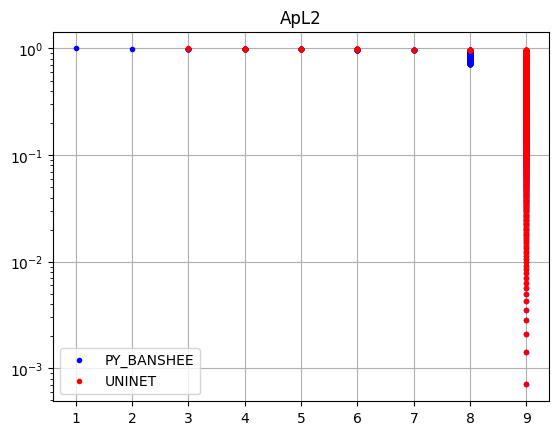

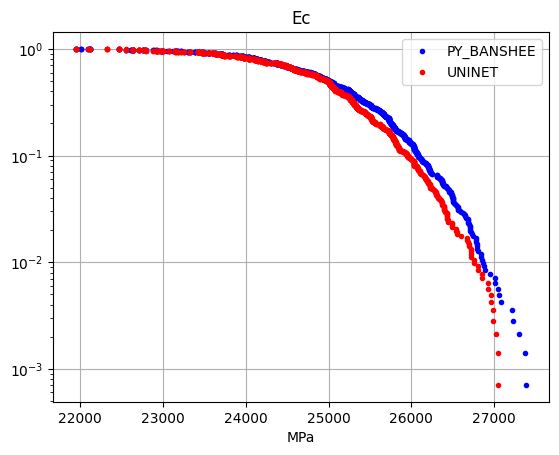

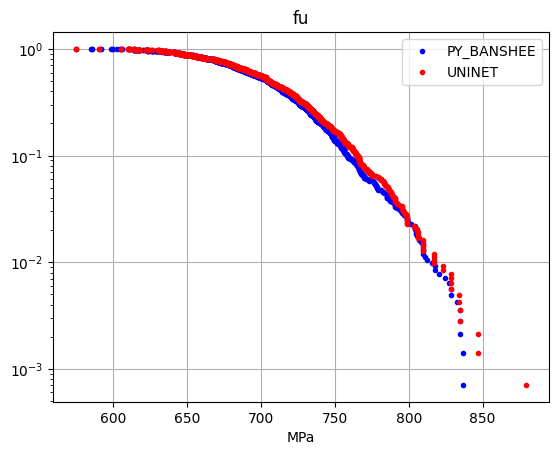

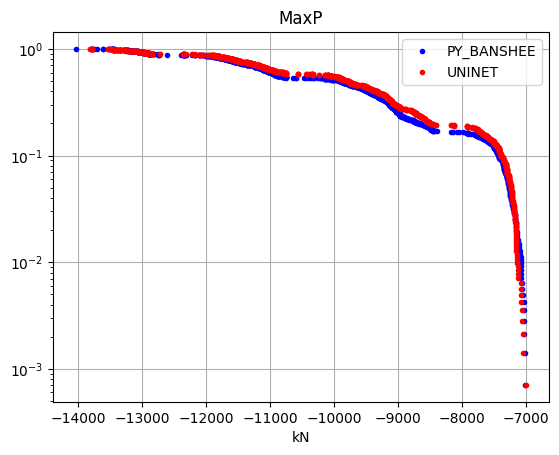

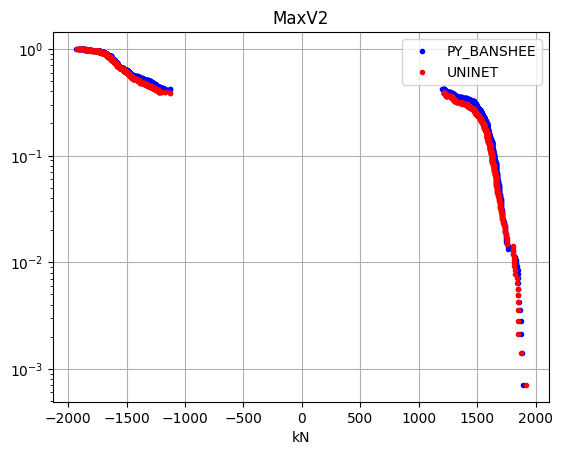

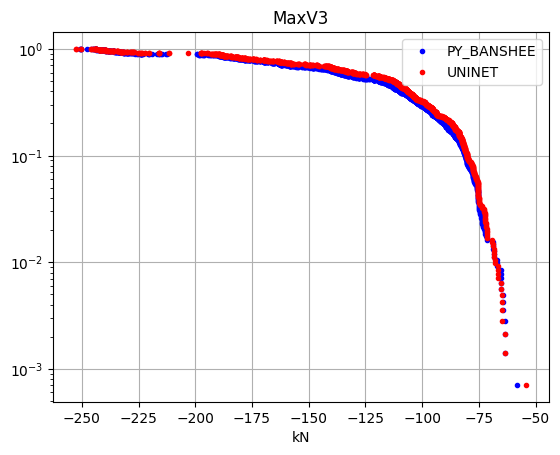

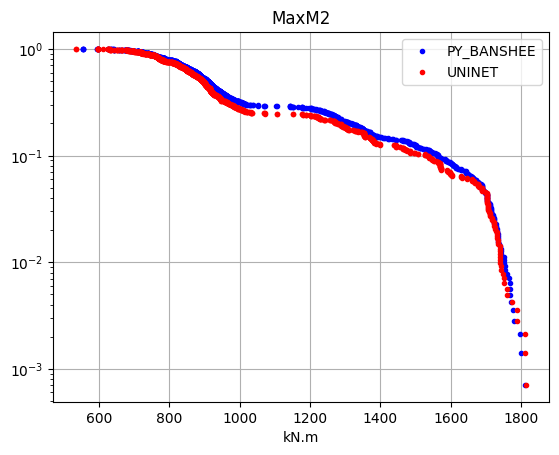

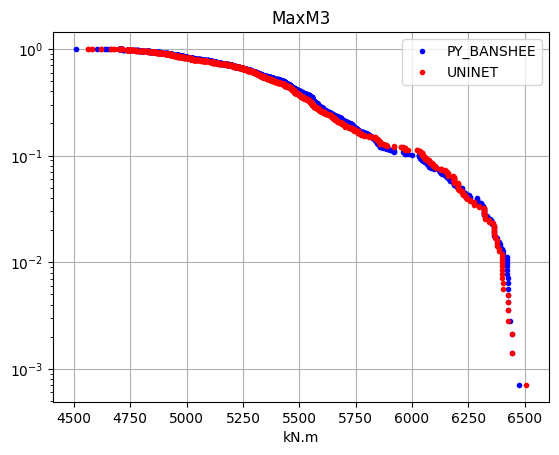

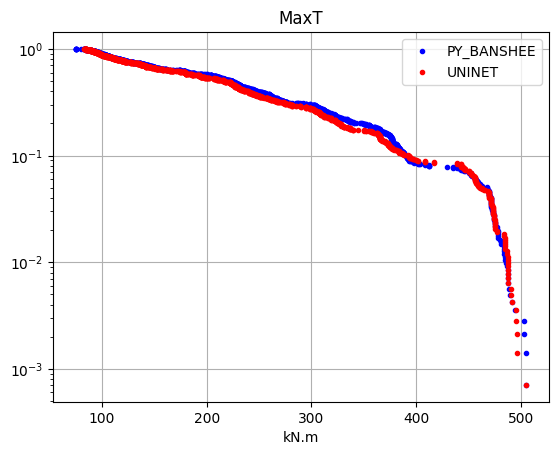

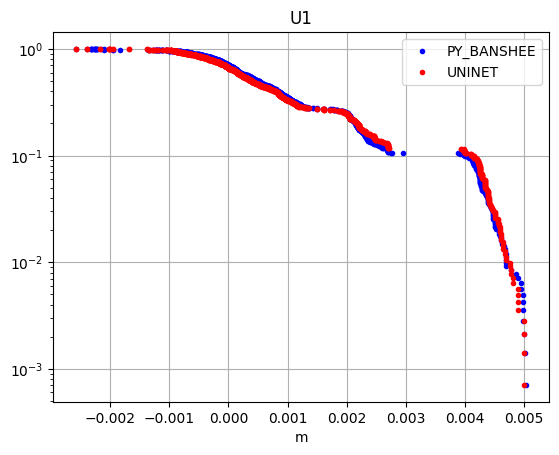

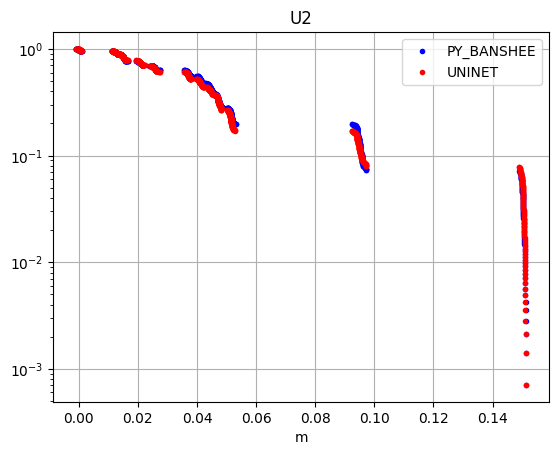

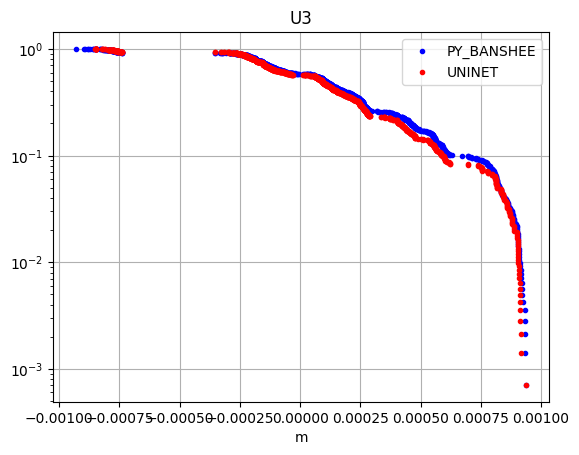

In [72]:
for i in range(len(output_nodes)):
    plt.semilogy(ecdf(sm_bc.iloc[:, output_nodes[i]])[0],
                 1 - ecdf(sm_bc.iloc[:,output_nodes[i]])[1],
                 '.b', label='PY_BANSHEE')
    plt.semilogy(ecdf(uninet_data_c6.iloc[:,output_nodes[i]])[0],
                 1 - ecdf(uninet_data_c6.iloc[:,output_nodes[i]])[1],
                 '.r', label='UNINET')
    plt.title(data.columns[output_nodes[i]])
    plt.xlabel(units[output_nodes[i]])
    plt.legend()
    plt.grid(axis='both')
    plt.savefig('ecdf_0'+str(i)+'.png')
    plt.show()